<a href="https://colab.research.google.com/github/Srinithi30/Agricultural-Portal/blob/main/Kovai_co.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [17]:
file_path = "/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv"

In [18]:
df = pd.read_csv(file_path)

In [30]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')
df['Other'] = df['Other'].fillna(method='ffill')
df['Weekday'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df['Is_Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])

<ipython-input-30-ba7177191a67>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Other'] = df['Other'].fillna(method='ffill')


In [31]:
services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']


📊 Insight 1: Average Daily Passengers by Service

In [32]:
avg_service = df[services].mean()
print("\n1️⃣ Average Daily Passengers by Service:\n", avg_service)


1️⃣ Average Daily Passengers by Service:
 Local Route      9891.395203
Light Rail       7195.446298
Peak Service      179.581335
Rapid Route     12597.213243
School           2352.694995
dtype: float64


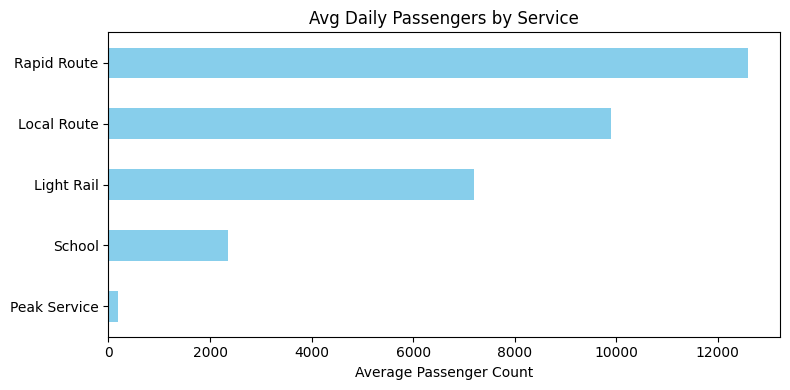

In [33]:
plt.figure(figsize=(8, 4))
avg_service.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Average Passenger Count")
plt.title("Avg Daily Passengers by Service")
plt.tight_layout()
plt.show()

In [ ]:
📊 Insight 2: Weekday vs Weekend Usage

In [34]:
week_comp = df.groupby('Is_Weekend')[services].mean()
week_comp.index = ['Weekday', 'Weekend']
print("\n2️⃣ Weekday vs Weekend Usage:\n", week_comp)


2️⃣ Weekday vs Weekend Usage:
           Local Route   Light Rail  Peak Service   Rapid Route       School
Weekday  12755.348175  8355.815328    251.413869  15297.278102  3293.729197
Weekend   2731.512774  4294.523723      0.000000   5847.051095     0.109489


<Figure size 1000x500 with 0 Axes>

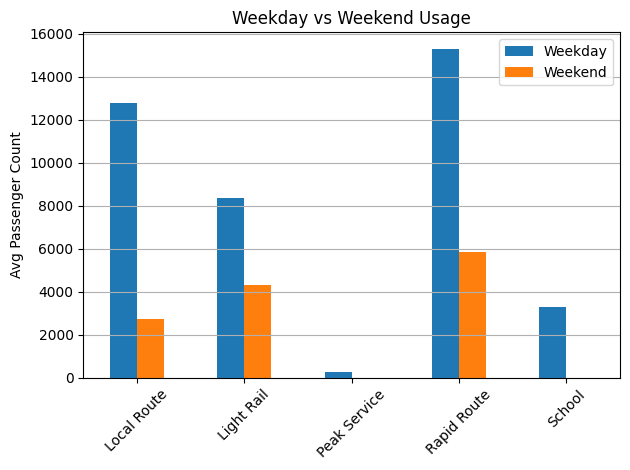

In [35]:
plt.figure(figsize=(10, 5))
week_comp.T.plot(kind='bar')
plt.title("Weekday vs Weekend Usage")
plt.ylabel("Avg Passenger Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Insight 3: Annual Passenger Totals

In [36]:
yearly_totals = df.groupby('Year')[services].sum()
print("\n3️⃣ Total Annual Passengers by Year:\n", yearly_totals)


3️⃣ Total Annual Passengers by Year:
       Local Route  Light Rail  Peak Service  Rapid Route  School
Year                                                            
2019      2417860     1782046         52845      3397061  531950
2020      2994326     2007162         52232      3755090  819218
2021      3010241     1976253         50270      3511858  742226
2022      3337746     2469844         50223      4141963  813800
2023      4027317     3192432         78806      5330372  895655
2024      3184206     2373129         60061      4025111  709620


<Figure size 1000x500 with 0 Axes>

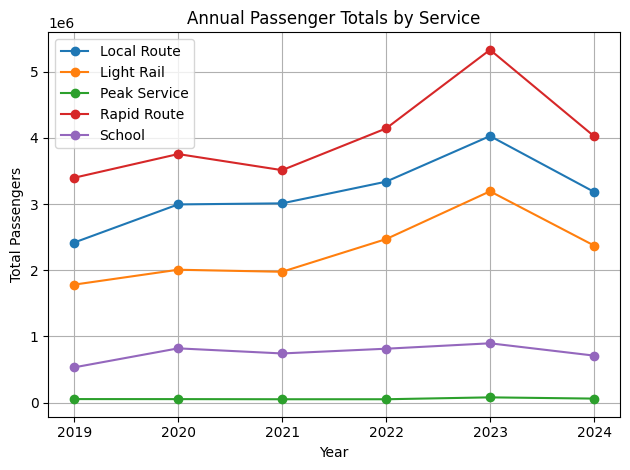

In [37]:
plt.figure(figsize=(10, 5))
yearly_totals.plot(marker='o')
plt.title("Annual Passenger Totals by Service")
plt.ylabel("Total Passengers")
plt.grid(True)
plt.tight_layout()
plt.show()

Insight 4: School Service Variability

In [38]:
school_mean = df['School'].mean()
school_std = df['School'].std()
print(f"\n4️⃣ School Service - Mean: {school_mean:.2f}, Std Dev: {school_std:.2f}")



4️⃣ School Service - Mean: 2352.69, Std Dev: 2494.77


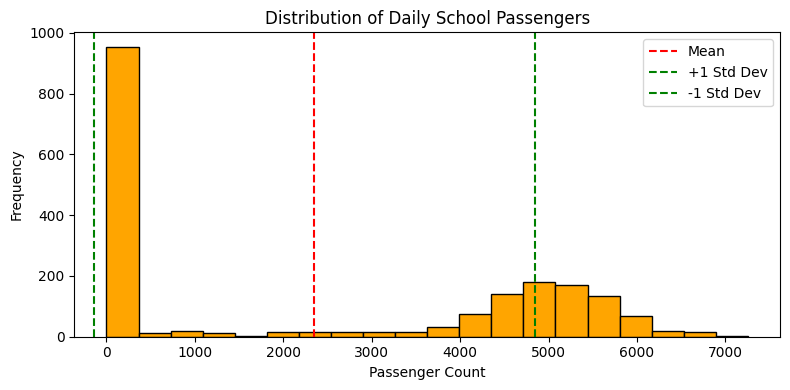

In [39]:
plt.figure(figsize=(8, 4))
plt.hist(df['School'], bins=20, color='orange', edgecolor='black')
plt.axvline(school_mean, color='red', linestyle='--', label='Mean')
plt.axvline(school_mean + school_std, color='green', linestyle='--', label='+1 Std Dev')
plt.axvline(school_mean - school_std, color='green', linestyle='--', label='-1 Std Dev')
plt.title("Distribution of Daily School Passengers")
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

Insight 5: Most Used Service

In [40]:
most_used_service = avg_service.idxmax()
print(f"\n5️⃣ Most used service: {most_used_service} with average {avg_service.max():.0f} passengers/day")


5️⃣ Most used service: Rapid Route with average 12597 passengers/day


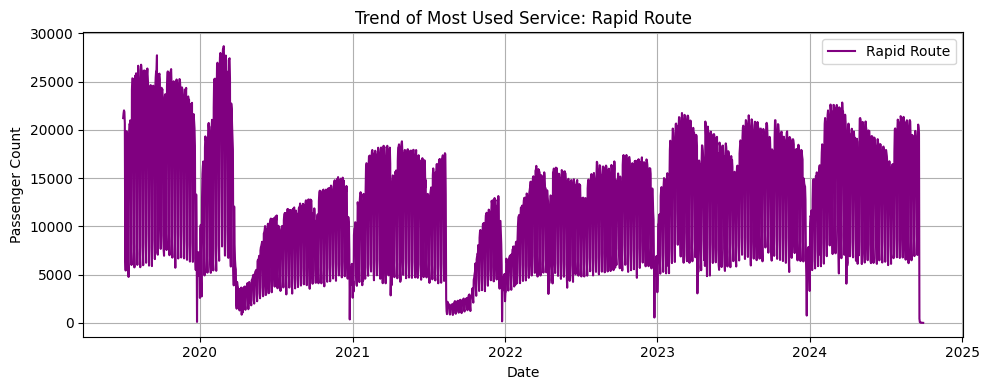

In [41]:
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df[most_used_service], color='purple', label=most_used_service)
plt.title(f"Trend of Most Used Service: {most_used_service}")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
def arima_forecast(service_column, steps=7):
    series = df.set_index('Date')[service_column].asfreq('D').fillna(method='ffill')
    model = ARIMA(series, order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

In [43]:
forecast_results = {service: arima_forecast(service) for service in services}


<ipython-input-42-820bb0776b28>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df.set_index('Date')[service_column].asfreq('D').fillna(method='ffill')
<ipython-input-42-820bb0776b28>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df.set_index('Date')[service_column].asfreq('D').fillna(method='ffill')
<ipython-input-42-820bb0776b28>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df.set_index('Date')[service_column].asfreq('D').fillna(method='ffill')
<ipython-input-42-820bb0776b28>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df.set_index('Date')[service_column].asfreq('D').fillna(method='ffil

In [44]:
forecast_df = pd.concat(forecast_results.values(), axis=1)
forecast_df.columns = [f'Forecast_{s}' for s in services]
forecast_df.index.name = 'Date'
forecast_df.reset_index(inplace=True)

In [45]:
print("\n🔮 7-Day Forecast:\n", forecast_df)



🔮 7-Day Forecast:
         Date  Forecast_Local Route  Forecast_Light Rail  \
0 2024-09-30             19.927210            47.731634   
1 2024-10-01             26.283602            33.808360   
2 2024-10-02             16.928221            10.052723   
3 2024-10-03             10.186647             3.950733   
4 2024-10-04              7.715581             7.985661   
5 2024-10-05              1.772591            -3.140410   
6 2024-10-06              7.216738            17.814863   

   Forecast_Peak Service  Forecast_Rapid Route  Forecast_School  
0              -0.278839             13.744551        -0.078446  
1               0.473911             17.411582         4.163464  
2               0.425999              5.206496         4.371625  
3               0.137035              7.641477         1.981355  
4              -0.008402              9.309906         0.786277  
5               0.113203              4.493111         0.905479  
6              -0.185497              5.76308

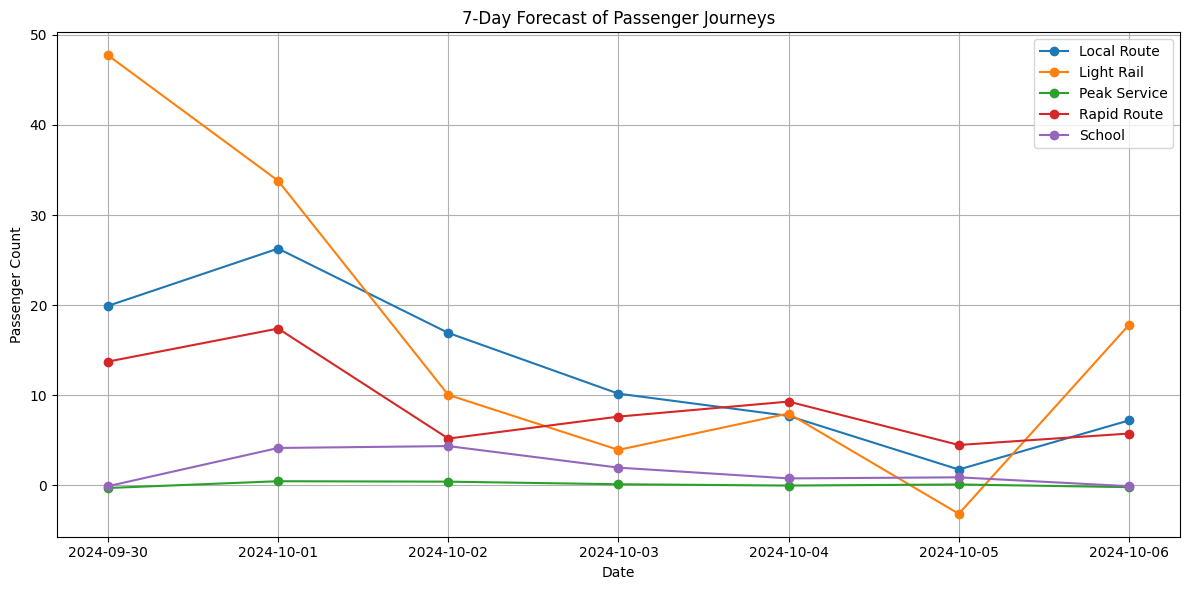

In [46]:
plt.figure(figsize=(12, 6))
for col in forecast_df.columns[1:]:
    plt.plot(forecast_df['Date'], forecast_df[col], marker='o', label=col.replace("Forecast_", ""))
plt.title("7-Day Forecast of Passenger Journeys")
plt.ylabel("Passenger Count")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()